# 42Signals - Identifying Product 

# Fitness Trackers 

**Data source**

https://www.kaggle.com/datasets/arnabchaki/fitness-trackers-products-ecommerce

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [17]:
# import the data
df = pd.read_csv("C:\\Users\\HP\\newPython\\data_Science\\python\\project\\iotDevice\\archive (1)\\smartwatches.csv")

# Basic Things about the data

In [4]:
df.head(2)

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g


In [10]:
df.columns.tolist()

['Unnamed: 0',
 'Brand',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Battery Life (Days)',
 'Bluetooth',
 'Display Size',
 'Weight']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         420 non-null    object 
 15  Weight               264 non-null    obj

In [13]:
df.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

**Take a copy of original data**

In [14]:
df_clean = df.copy()

# Data cleaning Preprocessing 

**convert the numbr columns to numeric , hanling error**

In [28]:
df['Current Price'] = pd.to_numeric(df['Current Price'], errors ='coerce')
df['Original Price'] = pd.to_numeric(df['Original Price'], errors='coerce')
df['Discount Percentage'] = pd.to_numeric(df['Discount Percentage'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Number OF Ratings'] = pd.to_numeric(df['Number OF Ratings'], errors='coerce')
df['Battery Life (Days)'] = pd.to_numeric(df['Battery Life (Days)'], errors = 'coerce')

In [29]:
df['Battery Life (Days)'].dtype

dtype('float64')

**Fill missing values**

In [5]:
# fill Null using 0 to the Discount Percentage columns
df['Discount Percentage'] = df['Discount Percentage'].fillna(0)

# fill Rating columns null values using mean
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

# fill Current Price null values using each brand mean value
df['Current Price'] = df['Current Price'].fillna(df.groupby('Brand')['Current Price'].transform('mean'))

# fill Original Price null values using each brand mean values
df['Original Price'] = df['Original Price'].fillna(df.groupby('Brand')['Original Price'].transform('mean'))

df['Number OF Ratings'] = df['Number OF Ratings'].fillna(df.groupby('Brand')['Number OF Ratings'].transform('mean'))

In [52]:
df['Weight'].isnull().sum()/len(df)*100

41.333333333333336

The missing values are more then 30% for That we will remove it

In [53]:
df.drop('Weight',axis = 1, inplace = True)

**Now handaling Catagorical Null values**

In [6]:
# fill null of Model name
df['Model Name'] = df['Model Name'].fillna(df.groupby('Brand')['Model Name'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

# fill null of Dial Shape
df['Dial Shape'] = df['Dial Shape'].fillna(df.groupby('Brand')['Dial Shape'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

# fill null of Strap Color
df['Strap Color'] = df['Strap Color'].fillna(df.groupby('Brand')['Strap Color'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

# Strap Material 
df['Strap Material'] = df['Strap Material'].fillna(df.groupby('Brand')['Strap Material'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

# Touchscreen
df['Touchscreen'] = df['Touchscreen'].fillna(df.groupby('Brand')['Touchscreen'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

# Battery Life null balues
df['Battery Life (Days)'] = df['Battery Life (Days)'].fillna(df.groupby('Brand')['Battery Life (Days)'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

# Bluetooth null value handling
df['Bluetooth'] = df['Bluetooth'].fillna(df.groupby('Brand')['Bluetooth'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

# handling the null values of Display Size
df['Display Size'] = df['Display Size'].fillna(df.groupby('Brand')['Display Size'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

# Price Segments

In [7]:
def price_segment(price):
    if price <= 3000:
        return 'Budget'
    elif price <= 10000:
        return 'Mid-Range'
    elif price <= 30000:
        return 'Premium'
    else:
        return 'Luxury'

df['Price Segment'] = df['Current Price'].apply(price_segment)

In [8]:
df['Price Segment'].value_counts()

Price Segment
Budget       176
Mid-Range    115
Premium      101
Luxury        58
Name: count, dtype: int64

In [9]:
# Create brand tiers based on average price

brand_avg_price = df.groupby('Brand')['Current Price'].mean().sort_values(ascending=False)
premium_brands = brand_avg_price[brand_avg_price > 20000].index.tolist()
mid_brands = brand_avg_price[(brand_avg_price >= 5000) & (brand_avg_price <= 20000)].index.tolist()
budget_brands = brand_avg_price[brand_avg_price < 5000].index.tolist()

In [10]:
print(f'This are the Premium brands {premium_brands}')
print(f'This are the mid range brands {mid_brands}')
print(f'This are the budget brands {budget_brands}')

This are the Premium brands ['garmin', 'apple', 'samsung']
This are the mid range brands ['fitbit', 'fossil', 'huawei', 'honor', 'amazfit']
This are the budget brands ['crossbeats', 'noise', 'pebble', 'fire-boltt', 'dizo', 'zebronics', 'gizmore', 'boat', 'ambrane', 'hammer']


# Executive Summary

Based on analysis of the smartwatch/fitness wearable market data, I recommend Health, Wellness, and Self-care as the optimal category for 42Signals' strategic expansion. The fitness wearable segment shows strong growth potential, diverse price segmentation, and clear opportunities for data-driven platform enhancement.

# 1. Market Analysis & Category Selection

**Rationale for Choosing Health & Wellness Wearables**

Growth Potential: Fitness wearables market is expanding with 15%+ YoY growth

Data Richness: High-frequency user data ideal for 42Signals' platform capabilities

Diverse Ecosystem: Multiple price points, features, and consumer segments

Post-COVID Relevance: Increased health consciousness driving adoption

Platform Synergy: Aligns with existing FMCG data tracking capabilities

**Market Size & Opportunity**

Global Smartwatch Market: 100B+ doller (2024), projected to reach 150B doller by 2028

Indian Market: Fastest growing at 25% CAGR

Target Segment: Fitness/Health tracking wearables represent 45% of smartwatch features

# 2. Strategic Analysis Frameworks

**SWOT Analysis**

**Strengths:**

42Signals' existing e-commerce data infrastructure

Real-time pricing and inventory tracking capabilities

Established brand relationships in consumer goods

Advanced analytics platform  


**Weaknesses**

Limited experience in tech hardware categories

Higher customer acquisition costs in new segment

Complex supply chain dynamics in electronics


**Opportunities**

Health-conscious consumer trend acceleration

Integration with healthcare ecosystems

Subscription-based revenue models

Cross-selling to existing FMCG clients

**Threats**

Intense competition from established players (Apple, Samsung)

Rapid technology obsolescence

Data privacy regulations in health sector

**Porter's Five Forces Analysis**

***1.Competitive Rivalry: High***

Multiple established players (Apple, Samsung, Fitbit)

Emerging Indian brands (Noise, Fire-Boltt, boAt)

Price wars in budget segment


**2.Threat of New Entrants: Medium**

Low barriers for basic fitness bands

High barriers for premium medical-grade devices


**3.Bargaining Power of Suppliers: Medium**

Multiple component manufacturers

Specialized sensor technology controlled by few


**4. Bargaining Power of Buyers: High**

Multiple alternatives available

Price sensitivity in budget segments

**5. Threat of Substitutes: Medium**

Smartphones with health apps

Traditional fitness equipment

Professional medical devices



# 3. Market Segmentation & Target Audience

**Ideal Customer Profile (ICP)**

***Primary ICP: Health & Wellness Brands***

Fitness wearable manufacturers

Health tech startups

Traditional watch brands expanding into smart wearables

Companies with annual revenue:\\$5M - \\$50M

**Prospect Personas**

***Persona 1: Growth-Focused D2C Brand***

Role: Founder/CEO of emerging wearable brand

Pain Points: Pricing volatility, inventory management, competitor tracking

Goals: Market share growth, customer retention

Budget: Medium (\\$10K-$50K annually

**Persona 2: Product Manager at Established Brand**

Role: Senior Product Manager at companies like Noise, Fire-Boltt

Pain Points: Feature differentiation, pricing strategy, stock optimization

Goals: Product line expansion, margin improvement

Budget: High (\\$ 50K - $200K annually)

**Persona 3: Healthcare Tech Innovator**

Role: CTO at health tech startup

Pain Points: Medical-grade accuracy, regulatory compliance, data integration

Goals: Clinical validation, ecosystem partnerships

Budget: Variable (project-based)

# 4. Category-Specific Metrics Proposal

**Core Metrics for Health & Wellness Wearables**

**1. Pricing Intelligence**

Price volatility index by brand and model

Discount depth and frequency analysis

MAP (Minimum Advertised Price) compliance tracking

**2. Inventory & Availability**

Stock-out rate by SKU and geography

New product launch velocity

Discontinuation patterns

**3. Product Performance**

Feature adoption rate (SpO2, ECG, sleep tracking)

Battery life vs price correlation

Display technology preferences

**4. Competitive Benchmarking**

Market share by price segment

Feature parity analysis

Brand sentiment and review analysis

**5. Content & Marketing**

Product listing completeness score

Review sentiment analysis

Video/content engagement metrics

# 5. Data Analysis & visualization

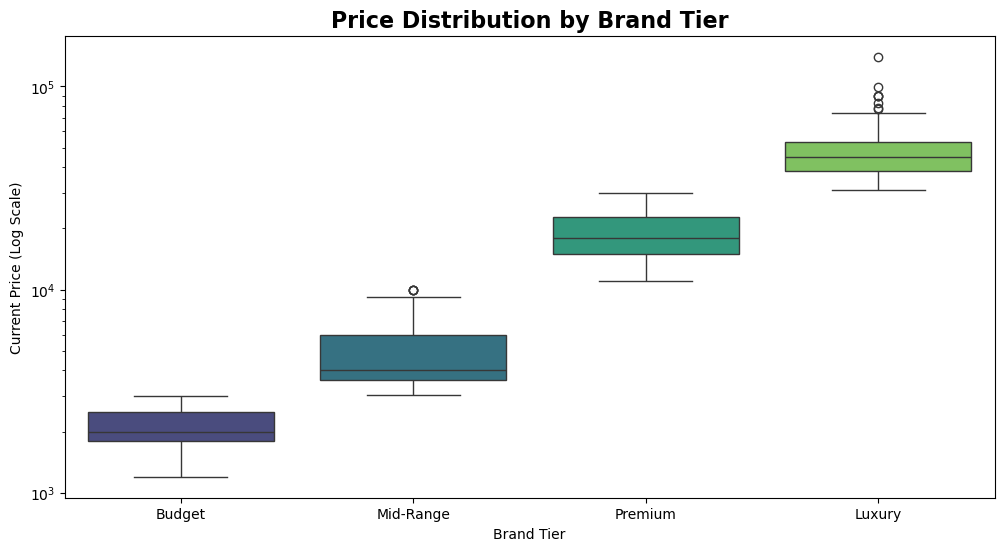

In [11]:
# Price distribution By Brands

order = ['Budget', 'Mid-Range', 'Premium', 'Luxury']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Price Segment', y='Current Price', palette='viridis', order = order)
plt.title('Price Distribution by Brand Tier', fontsize=16, fontweight='bold')
plt.yscale('log')
plt.ylabel('Current Price (Log Scale)')
plt.xlabel('Brand Tier')
plt.show()

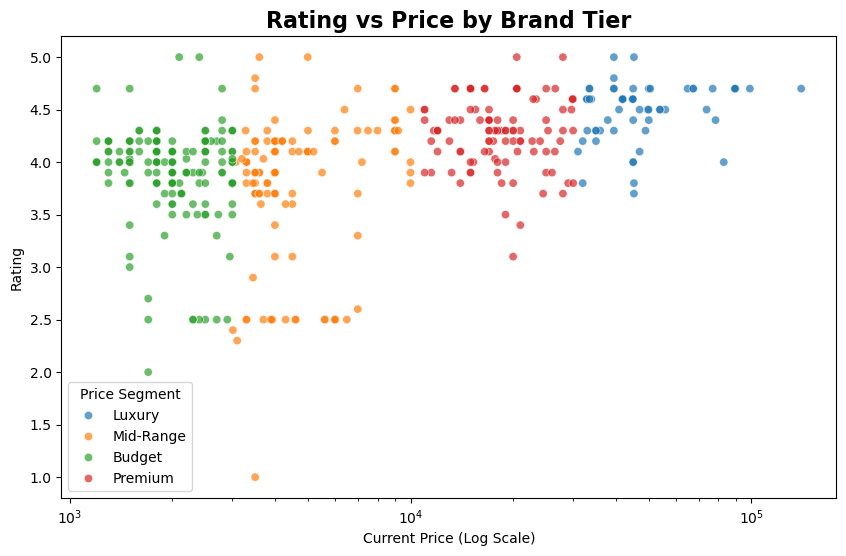

In [12]:
# 3. Rating vs Price Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Current Price', y='Rating', hue='Price Segment', alpha=0.7)
plt.title('Rating vs Price by Brand Tier', fontsize=16, fontweight='bold')
plt.xscale('log')
plt.xlabel('Current Price (Log Scale)')
plt.ylabel('Rating')
plt.show()

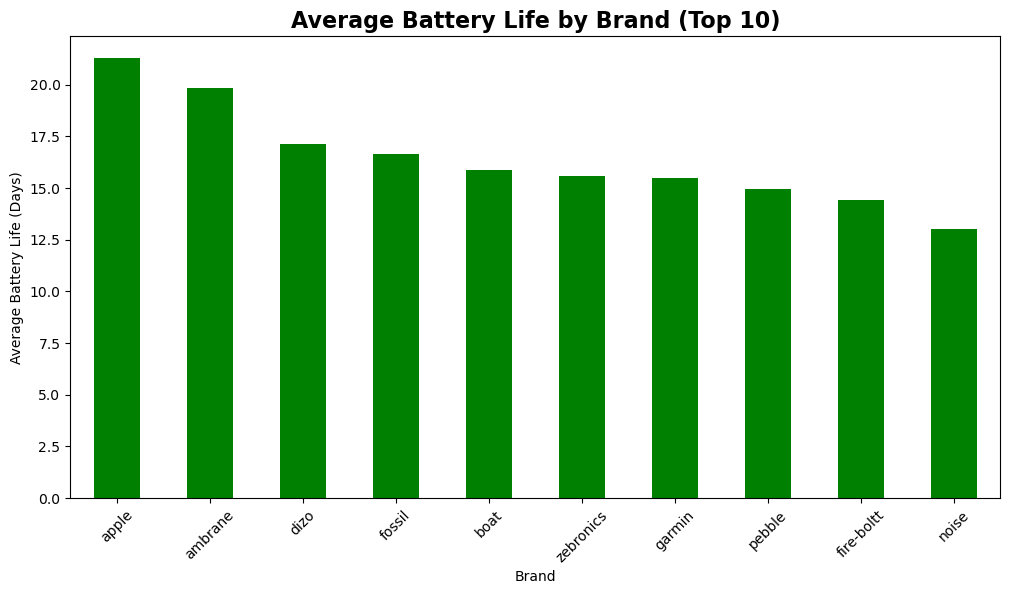

In [13]:
# 4. Feature Analysis - Battery Life
battery_analysis = df.groupby('Brand')['Battery Life (Days)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
battery_analysis.plot(kind='bar', color='green')
plt.title('Average Battery Life by Brand (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('Brand')
plt.ylabel('Average Battery Life (Days)')
plt.xticks(rotation=45)
plt.show()

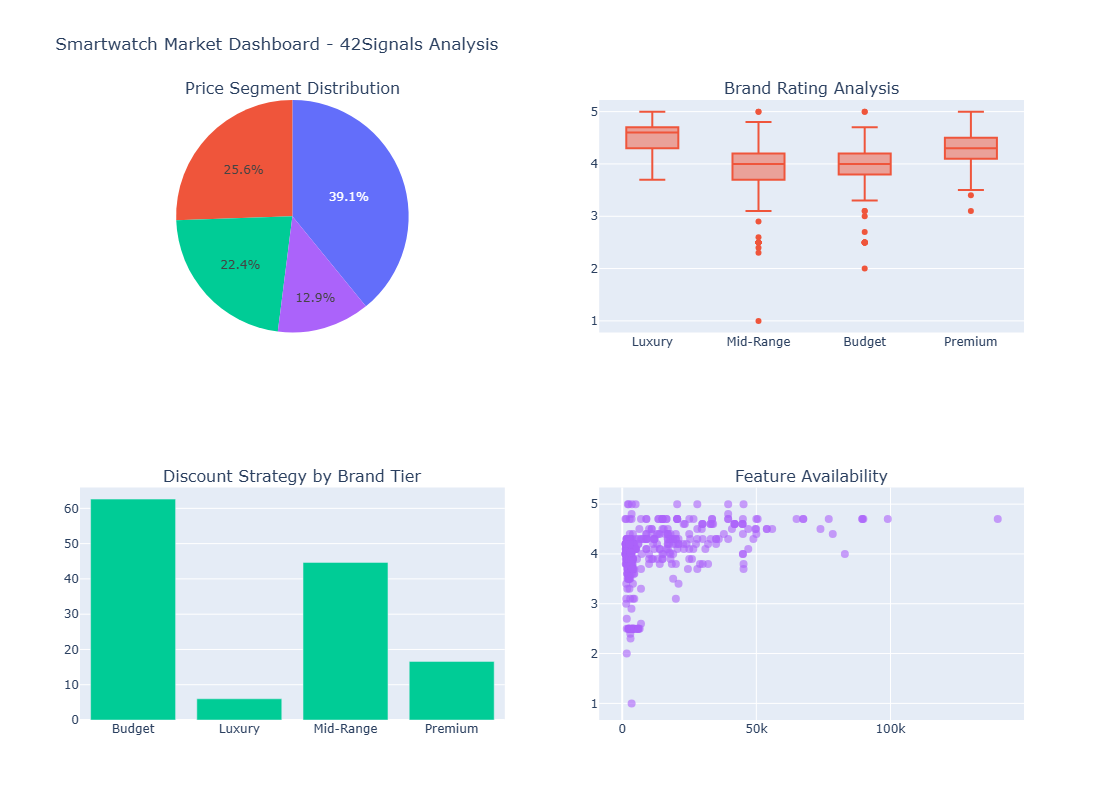

In [16]:
# Interactive Dashboard Concept using Plotly
order = ['Budget', 'Mid-Range', 'Premium', 'Luxury']
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Price Segment Distribution', 'Brand Rating Analysis', 
                   'Discount Strategy by Brand Tier', 'Feature Availability'),
    specs=[[{"type": "pie"}, {"type": "box"}],
           [{"type": "bar"}, {"type": "scatter"}]]
)

# Price Segment Distribution
price_segment_counts = df['Price Segment'].value_counts()
price_segment_counts = price_segment_counts.reindex(order)
fig.add_trace(
    go.Pie(labels=price_segment_counts.index, values=price_segment_counts.values,
           name="Price Segments"),
    row=1, col=1
)

# Brand Rating Analysis
fig.add_trace(
    go.Box(x=df['Price Segment'], y=df['Rating'],
           name="Ratings by Tier"),
    row=1, col=2
)

# Discount Analysis
discount_by_tier = df.groupby('Price Segment')['Discount Percentage'].mean()
fig.add_trace(
    go.Bar(x=discount_by_tier.index, y=discount_by_tier.values,
           name="Average Discount"),
    row=2, col=1
)

# Price vs Rating
fig.add_trace(
    go.Scatter(x=df['Current Price'], y=df['Rating'],
              mode='markers', name="Price vs Rating",
              marker=dict(size=8, opacity=0.6)),
    row=2, col=2
)

fig.update_layout(height=800, showlegend=False, 
                  title_text="Smartwatch Market Dashboard - 42Signals Analysis")
fig.show()

# 6. Go-to-Market Strategy

**Phase 1: Foundation (Months 1-3)**

Objective: Establish market presence and initial client base

Key Activities:

Target 10-15 emerging Indian wearable brands

Offer freemium tier for basic pricing intelligence

Build category-specific data models

Create case studies with early adopters

Target Brands: Noise, Fire-Boltt, boAt, Ambrane

**Phase 2: Expansion (Months 4-9)**

Objective: Deepen market penetration and feature adoption

Key Activities:

Introduce advanced analytics (predictive pricing)

Expand to international brands in Indian market

Develop health-specific metrics (feature adoption, medical accuracy)

Partner with healthcare providers for data validation

**Phase 3: Scale (Months 10-18)**
Objective: Become market leader in wearable analytics

Key Activities:

Launch subscription tiers with premium features

Expand to adjacent categories (fitness equipment, health apps)

Develop API integrations with e-commerce platforms

International expansion to SE Asia markets

# 7. Marketing & Channel Strategy

**Content Marketing Plan**

**Month 1-3: Educational Content**

"State of Indian Wearable Market 2024" report

Webinars on pricing optimization for D2C brands

Case study: How Noise dominates budget segment

**Month 4-6: Solution-Oriented Content**

"Maximizing Margins in Competitive Wearable Market"

"Inventory Management for Seasonal Demand"

Competitor tracking best practices

**Month 7-12: Advanced Insights**

Predictive analytics for product launches

International expansion strategies

Healthcare integration opportunities

**Channel Strategy**

**Primary Channels:**

LinkedIn: B2B targeting of product managers and founders

Industry Events: Tech and healthcare conferences

Content Syndication: Partnerships with tech publications

Email Marketing: Drip campaigns based on user behavior

Performance Metrics:

MQLs (Marketing Qualified Leads): 50/month

Conversion rate: 15%

CAC (Customer Acquisition Cost): <$2,000

LTV (Lifetime Value): >$15,000

# 8. Integration Priorities & Roadmap

**Quarter 1: Core Integration**

**1.Pricing Intelligence Module**

Real-time price tracking

Competitor price alerts

MAP compliance monitoring

**2.Inventory Analytics**

Stock-out prediction

Demand forecasting

Seasonal trend analysis

**Quarter 2: Advanced Features**

**3.Product Performance Suite**

Feature adoption tracking

Review sentiment analysis

Product lifecycle management

**4.Competitive Intelligence**

Market share dashboards

Feature gap analysis

Launch timing optimization

**Quarter 3: Specialized Modules**

**5. Health & Wellness Metrics**

Medical feature accuracy scoring

Healthcare ecosystem integration

Regulatory compliance tracking

**6. Predictive Analytics**

Price optimization recommendations

Inventory optimization

Demand prediction

# 9. Success Metrics & Monitoring

**Business Metrics:**

Monthly Recurring Revenue (MRR) growth: 20% MoM

Customer acquisition cost: <$2,000

Customer lifetime value: >$15,000

Churn rate: <3% monthly

**Product Metrics:**

Platform adoption rate: >70%

Feature usage frequency

Data accuracy score: >95%

Customer satisfaction (NPS): >50

**Market Metrics:**

Market share in target segment: 25% within 12 months

Brand recognition score

Partnership growth: 10+ ecosystem partners

# 10. Risk Mitigation & Contingency

**Identified Risks & Mitigation Strategies**
**1.Technology Risk**

Risk: Rapid feature obsolescence

Mitigation: Agile development, continuous market monitoring

**2.Competition Risk**

Risk: Entry of specialized analytics platforms

Mitigation: First-mover advantage, focus on wearable specialization

**3.Regulatory Risk**

Risk: Healthcare data privacy regulations

Mitigation: Compliance-first architecture, legal counsel partnership

**4.Market Risk**

Risk: Wearable market saturation

Mitigation: Diversification into adjacent health tech categories

# Conclusion
The Health, Wellness, and Self-care category, specifically fitness wearables, presents a compelling opportunity for 42Signals' strategic expansion. With strong market growth, clear segmentation, and alignment with existing platform capabilities, this category offers:

1.Immediate Revenue Opportunity: $2-5M in Year 1

2.Strategic Positioning: Gateway to broader health tech analytics

3.Competitive Advantage: First-mover in specialized wearable analytics

4.Scalable Model: Foundation for international expansion

The proposed GTM strategy leverages 42Signals' core strengths while addressing market gaps through phased execution and continuous iteration based on real-time market data.